# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
print(f"Number of mice: {number_of_mice}")

Number of mice: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
print(f"Duplicate Mouse IDs: {duplicate_mouse_ids}")

Duplicate Mouse IDs: ['g989']


In [7]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice in the clean DataFrame.
number_of_clean_mice = clean_mouse_data['Mouse ID'].nunique()
print(f"The number of clean mice is: {number_of_clean_mice}")

The number of clean mice is: 248


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_mouse_data.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumore_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_Sem=('Tumor Volume (mm3)', 'sem')

)

#This is my display of my Statistics Table
summary_stats

,Mean_Tumor_Volume,Median_Tumore_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary_stats = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
).rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volumn Variance',
    'std': 'Tumor Volume Std Dev',
    'sem': 'Tumor Volumn SEM'
})

#This is me displaying my Advanced Summary Statisctics Table 

advanced_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volumn Variance,Tumor Volume Std Dev,Tumor Volumn SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

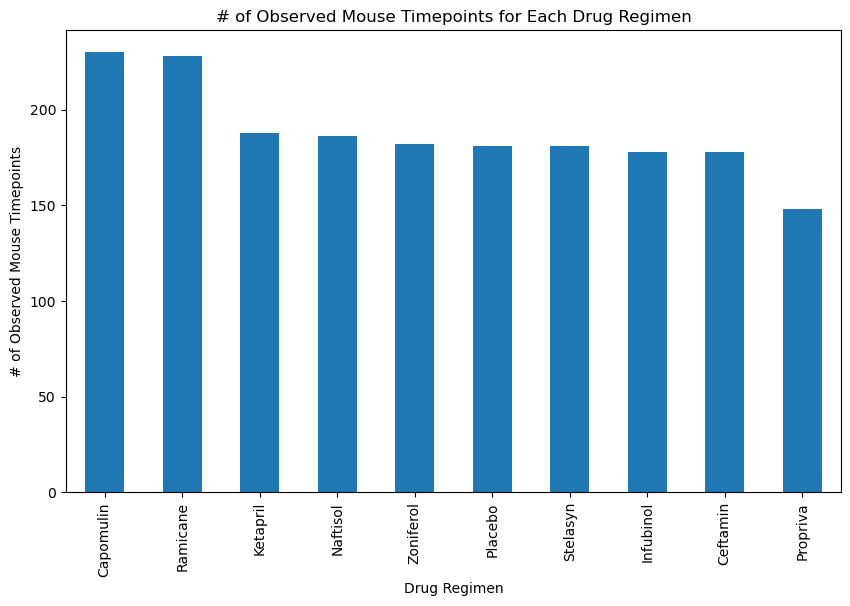

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints = clean_mouse_data['Drug Regimen'].value_counts()
mouse_timepoints.plot(kind='bar', figsize=(10,6))
plt.title('# of Observed Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

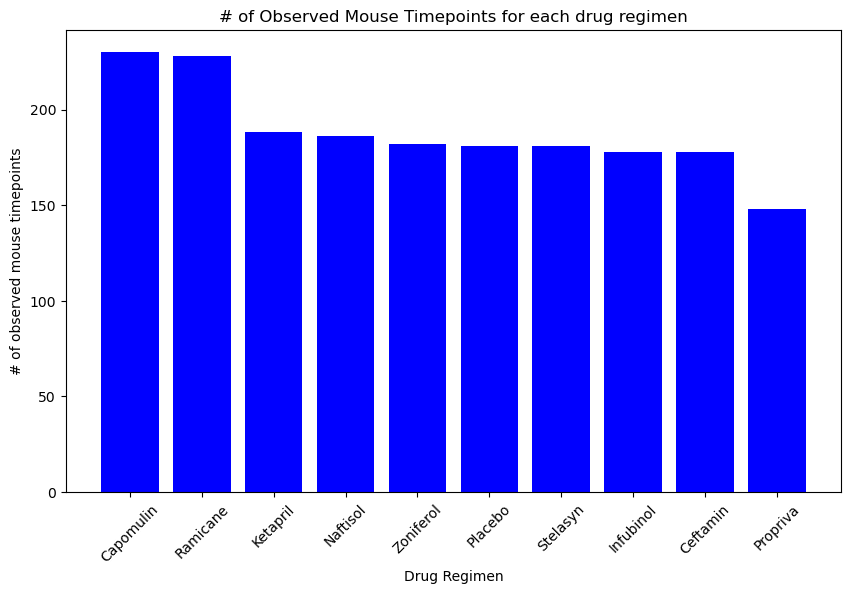

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_timepoints = clean_mouse_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(mouse_timepoints.index, mouse_timepoints.values, color='blue')
plt.title('# of Observed Mouse Timepoints for each drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed mouse timepoints')
plt.xticks(rotation=45)
plt.show()

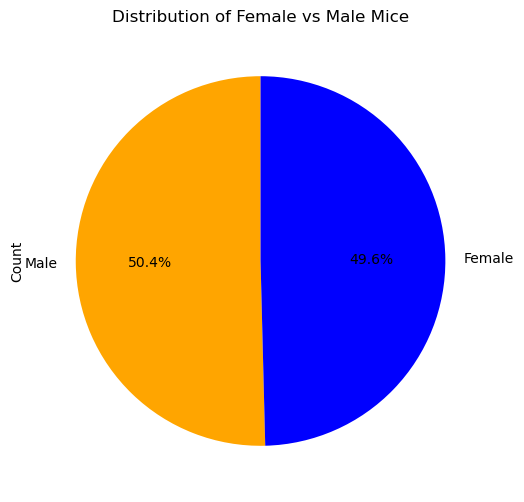

In [49]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_mouse_data.drop_duplicates(subset='Mouse ID') 



# Get the unique mice with their gender
gender_distribution= unique_mice['Sex'].value_counts()



# Make the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", startangle=90, colors=["orange", "blue"])
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Count")

plt.show()


(-1.1219982335602217,
 1.1219982274182907,
 -1.100278675182684,
 1.1002786816292576)

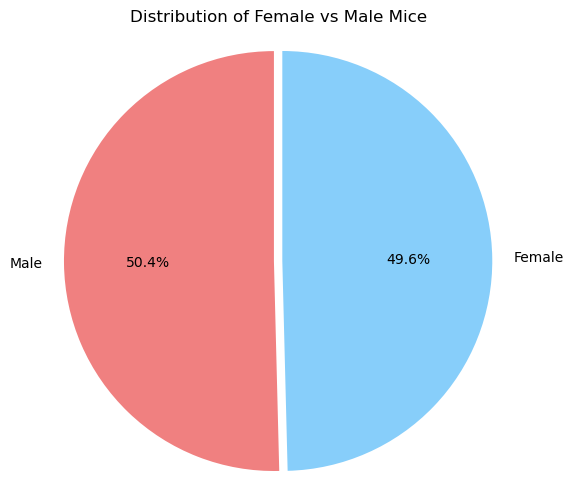

In [58]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_mouse_data.drop_duplicates(subset='Mouse ID')
gender_distribution = unique_mice['Sex'].value_counts()


# Make the pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90,
        colors=['lightcoral', 'lightskyblue'], explode=[0.02,0.02])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')


## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_mouse_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(max_timepoints, clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filtering for the 4 Treatments 
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol_filtered = [final_tumor_vol['Drug Regimen'].isin(treatments)]



In [85]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {}

# Calculate the IQR and Quantitatively determine if there are any outliers
for treatment in treatment_list:
    treatment_data = final_tumor_vol[final_tumor_vol['Drug Regimen'] == treatment]['Tumor Volume (mm3)']  # Extract tumor volumes for each treatment
    tumor_vol_data[treatment] = treatment_data  # Add data to the dictionary
    
    # Calculate the quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq  # Calculate IQR


     # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # Print outliers
    print(f"{treatment}'s potential outliers: {outliers}")




    
  





Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


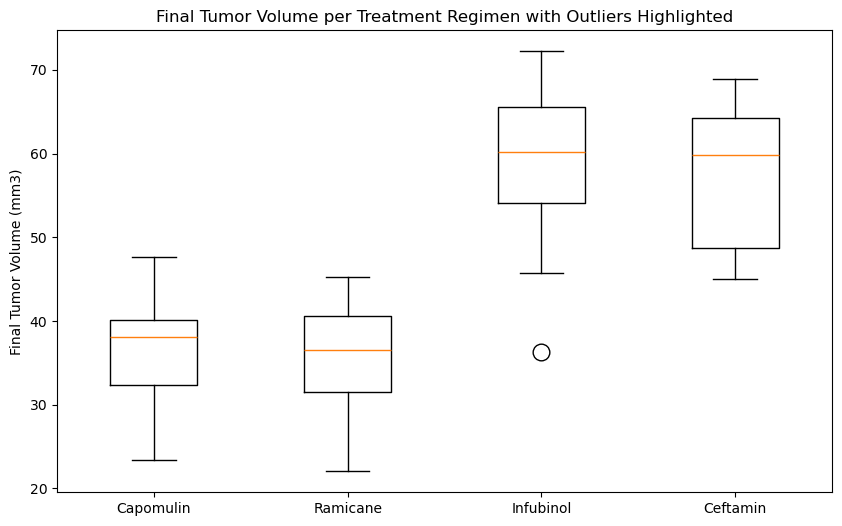

In [86]:
# Generating a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))  # Set the figure size

# Creating boxplot for each treatment regimen
plt.boxplot(tumor_vol_data.values(), labels=tumor_vol_data.keys(), flierprops=dict(marker='o', color='r', markersize=12))

# Adding title and labels
plt.title('Final Tumor Volume per Treatment Regimen with Outliers Highlighted')
plt.ylabel('Final Tumor Volume (mm3)')

# Showing the plot
plt.show()


## Line and Scatter Plots

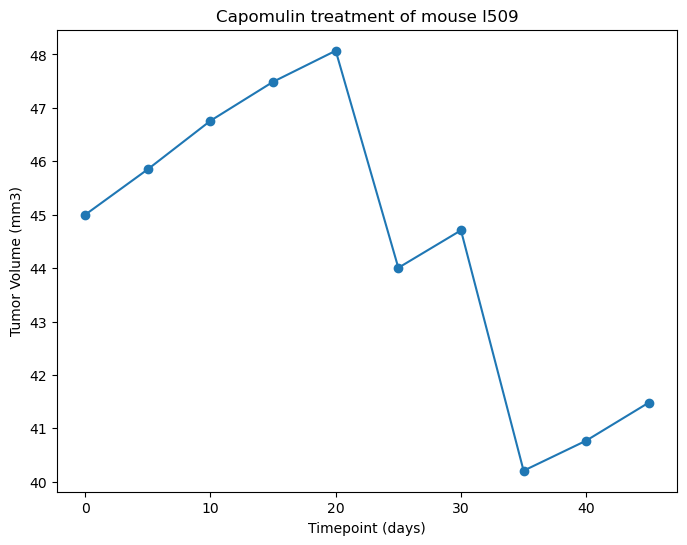

In [87]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filtering the data for a single mouse treated with Capomulin
mouse_id = 'l509'  # Replacing with the mouse ID you want to plot
capomulin_mouse = combined_data.loc[combined_data['Mouse ID'] == mouse_id]

# Generating a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(8, 6))

# Plotting the tumor volume (y-axis) vs time points (x-axis)
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o')

# Adding labels and title
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Showing the plot
plt.show()


/var/folders/_f/h54jm1913c532sl4vxln5y100000gn/T/ipykernel_1214/3342124126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capomulin_data['Weight (g)'] = pd.to_numeric(capomulin_data['Weight (g)'], errors='coerce')
/var/folders/_f/h54jm1913c532sl4vxln5y100000gn/T/ipykernel_1214/3342124126.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capomulin_data['Tumor Volume (mm3)'] = pd.to_numeric(capomulin_data['Tumor Volume (mm3)'], errors='coerce')


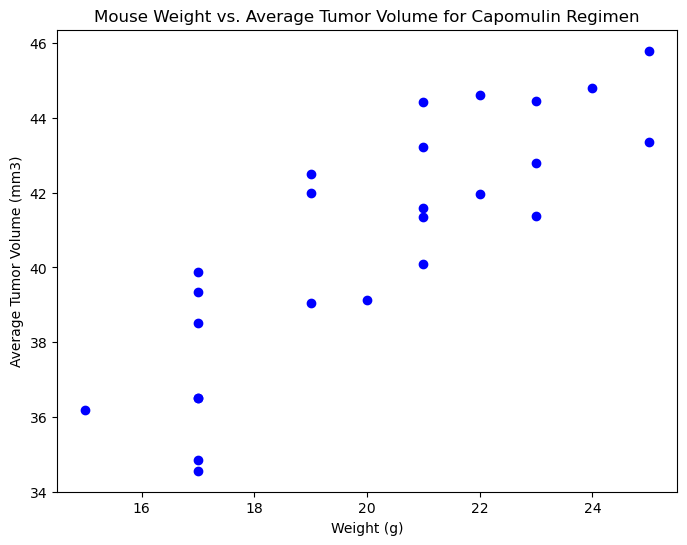

In [92]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Ensure the columns are numeric
capomulin_data['Weight (g)'] = pd.to_numeric(capomulin_data['Weight (g)'], errors='coerce')
capomulin_data['Tumor Volume (mm3)'] = pd.to_numeric(capomulin_data['Tumor Volume (mm3)'], errors='coerce')

# Calculate the average tumor volume for each mouse
capomulin_avg_tumor_vol = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))

# Plot the average tumor volume (y-axis) vs. weight (x-axis)
plt.scatter(capomulin_avg_tumor_vol['Weight (g)'], capomulin_avg_tumor_vol['Tumor Volume (mm3)'], color='blue')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


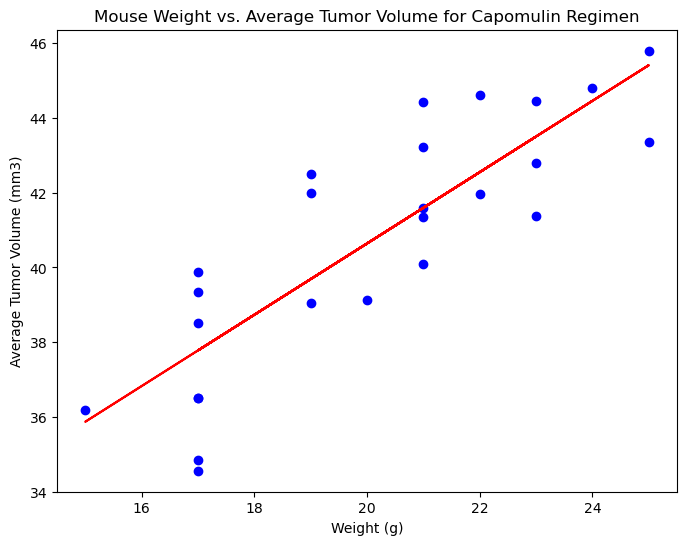

In [93]:
# Calculating the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Calculating the correlation coefficient between mouse weight and average tumor volume
correlation = capomulin_avg_tumor_vol['Weight (g)'].corr(capomulin_avg_tumor_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Performing linear regression on weight vs. average tumor volume
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_tumor_vol['Weight (g)'], 
                                                         capomulin_avg_tumor_vol['Tumor Volume (mm3)'])

# Generating a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_avg_tumor_vol['Weight (g)'], capomulin_avg_tumor_vol['Tumor Volume (mm3)'], color='blue')

# Plotting the linear regression line
regression_values = capomulin_avg_tumor_vol['Weight (g)'] * slope + intercept
plt.plot(capomulin_avg_tumor_vol['Weight (g)'], regression_values, color='red')

# Adding labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Showing the plot
plt.show()

